In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel('default of credit card clients.xls', header = 1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.rename({'default payment next month': 'default'}, axis = 1 , inplace = True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.drop('ID', axis =1, inplace = True)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.isnull().any()

LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
default      False
dtype: bool

In [10]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [11]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [13]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [14]:
len(df)

30000

In [15]:
no_missing_data = df.loc[(df['EDUCATION'] !=0) & (df['MARRIAGE'] !=0)]

In [16]:
len(no_missing_data)

29932

In [17]:
len(no_missing_data.loc[(no_missing_data['default']==1)])

6631

In [18]:
len(no_missing_data.loc[(no_missing_data['default']==0)])

23301

# Downsampling

In [17]:
#spliting into categories -> defaulters and non defaulters

In [19]:
dflt = no_missing_data[no_missing_data['default']==1]

In [33]:
ndflt = no_missing_data[no_missing_data['default']==0]

In [34]:
dflt_rsmpl = resample(dflt, replace = False, n_samples = 1000, random_state = 42)

In [35]:
ndflt_rsmpl = resample(ndflt, replace = False, n_samples = 1000, random_state = 42)

In [36]:
rsmpldf = pd.concat([dflt_rsmpl, ndflt_rsmpl])

In [37]:
rsmpldf.shape

(2000, 24)

# one hot endoding

In [38]:
rsmpldf.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [39]:
rsmpldf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
19982,300000,2,1,1,47,3,2,2,2,2,...,5000,5000,5000,0,0,0,0,0,0,1
19350,80000,2,2,2,36,2,0,0,-2,-2,...,0,0,0,1700,0,0,0,0,0,1
17057,30000,2,3,2,22,2,2,0,0,0,...,29507,11609,11711,0,1687,1147,524,400,666,1
26996,80000,1,1,2,34,2,2,2,2,2,...,64682,65614,67007,2800,3000,2500,2600,2600,2600,1
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,...,0,5646,14793,13462,17706,0,5646,14793,7376,1


In [40]:
encodeddf = pd.get_dummies(rsmpldf, columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ])

In [41]:
encodeddf.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,0,1,0,0,0,0,0,0,0,0


In [42]:
X = encodeddf.drop('default', axis = 1)

In [43]:
y = encodeddf['default']

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## scaling and centering ->mean = 0, std = 1

In [45]:
Xtrain_scaled = scale(Xtrain) 

In [46]:
Xtest_scaled = scale(Xtest)

In [47]:
clfsvm = SVC()

In [48]:
clfsvm.fit(Xtrain_scaled, ytrain)

SVC()

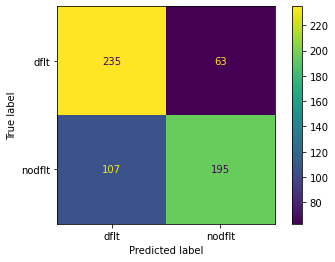

In [49]:
plot_confusion_matrix(clfsvm, Xtest_scaled, ytest, values_format = 'd' , display_labels = ['dflt', 'nodflt'])

## Opitimizing parameters using GridSearchcV

In [79]:
param = {'C' : [0.5, 1, 10, 100, 1000], 'gamma':['scale',1, 0.1, 0.01, 0.001 ], 
            'kernel': ['rbf']}

In [80]:
op_param =GridSearchCV(SVC(), param, cv = 5, scoring = 'accuracy', verbose = 2)

In [81]:
op_param.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   35.3s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [83]:
print(op_param.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [84]:
svm_c = SVC(C = 1, gamma = 0.01)

In [85]:
svm_c.fit(Xtrain_scaled, ytrain)

SVC(C=1, gamma=0.01)

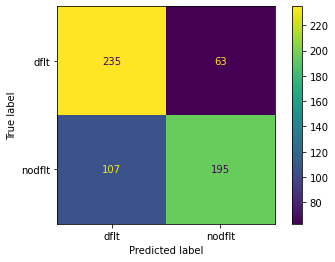

In [88]:
plot_confusion_matrix(clfsvm, Xtest_scaled, ytest, values_format = 'd' , display_labels = ['dflt', 'nodflt'])

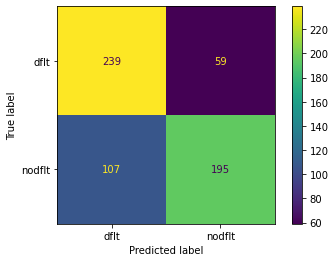

In [89]:
plot_confusion_matrix(svm_c, Xtest_scaled, ytest, values_format = 'd' , display_labels = ['dflt', 'nodflt'])

 # principal component analysis

reducing dimensions

In [91]:
pca = PCA()

In [93]:
pcad = pca.fit_transform(Xtrain_scaled)

In [98]:
pcad

array([[-3.68985307e-01,  5.96522615e+00,  1.26310351e+00, ...,
         3.16696240e-16, -1.59408479e-16, -1.21347492e-16],
       [ 3.63131032e+00, -1.30481379e+00,  3.07619449e-02, ...,
        -2.77337722e-16,  2.51905011e-16,  3.97058344e-16],
       [-2.29906378e+00,  9.64230639e+00,  5.08216531e-01, ...,
         1.11853848e-17,  8.06506377e-18, -6.46658215e-18],
       ...,
       [-3.47178835e-01, -5.88375686e-01, -1.76600879e+00, ...,
         3.47833431e-17, -9.60944376e-18,  7.33526286e-18],
       [-3.56340140e+00, -2.21127332e-01, -3.55599854e+00, ...,
         2.20561204e-17,  4.75065023e-17, -5.38931516e-17],
       [ 6.39430543e-01, -7.36458629e-01, -1.46723569e+00, ...,
         3.88914044e-17, -6.12256446e-19, -1.23821373e-17]])

In [97]:
Xtrain_scaled

array([[-0.75949049, -0.9416709 ,  0.05742805, ..., -0.02673567,
        -0.03782347, -0.04634068],
       [ 0.61530976, -0.41479884,  1.56783138, ..., -0.02673567,
        -0.03782347, -0.04634068],
       [-1.0829729 ,  0.84969409, -0.65883264, ..., -0.02673567,
        26.43860813, -0.04634068],
       ...,
       [-1.0021023 ,  1.16581733, -0.68023995, ..., -0.02673567,
        -0.03782347, -0.04634068],
       [-0.19339627, -0.83629649, -0.69050807, ..., -0.02673567,
        -0.03782347, -0.04634068],
       [-0.84036109, -1.46854296, -0.57743998, ..., -0.02673567,
        -0.03782347, -0.04634068]])

In [112]:
var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)

In [109]:
pca.explained_variance_ratio_.shape

(81,)

In [110]:
Xtrain_scaled.shape

(1400, 81)

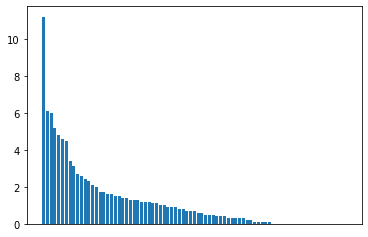

In [113]:
plt.bar(x = range(1, len(var)+1), height = var)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)

#### Difficult to select only a few features